<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp
import yfinance as yf

In [9]:
stock = 'META'
ticker = yf.Ticker(stock)
priceM = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

priceM.head()


,Close
Date,
2013-01-01 00:00:00-05:00,30.887001
2013-02-01 00:00:00-05:00,27.168200
2013-03-01 00:00:00-05:00,25.503214
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276905


In [10]:
priceM.index = priceM.index.strftime('%Y-%m-%d')
priceM.index = pd.to_datetime(priceM.index)

priceM

,Close
Date,
2013-01-01,30.887001
2013-02-01,27.168200
2013-03-01,25.503214
2013-04-01,27.686640
2013-05-01,24.276905
...,...
2023-08-01,295.001801
2023-09-01,299.308838
2023-10-01,300.365631


In [11]:
stock = 'NVDA'
ticker = yf.Ticker(stock)
priceN = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

priceN.head()

,Close
Date,
2013-01-01 00:00:00-05:00,0.282920
2013-02-01 00:00:00-05:00,0.292150
2013-03-01 00:00:00-05:00,0.297890
2013-04-01 00:00:00-04:00,0.319715
2013-05-01 00:00:00-04:00,0.335968


In [12]:
priceN.index = priceN.index.strftime('%Y-%m-%d')
priceN.index = pd.to_datetime(priceM.index)

priceN

,Close
Date,
2013-01-01,0.282920
2013-02-01,0.292150
2013-03-01,0.297890
2013-04-01,0.319715
2013-05-01,0.335968
...,...
2023-08-01,49.336006
2023-09-01,43.482258
2023-10-01,40.767666


In [13]:
data1 = priceM["2015":]
data1

,Close
Date,
2015-01-01,75.682137
2015-02-01,78.732948
2015-03-01,81.973190
2015-04-01,78.533539
2015-05-01,78.952286
...,...
2023-08-01,295.001801
2023-09-01,299.308838
2023-10-01,300.365631


In [14]:
data2 = priceN["2015":]
data2

,Close
Date,
2015-01-01,0.460854
2015-02-01,0.529502
2015-03-01,0.504313
2015-04-01,0.534914
2015-05-01,0.533228
...,...
2023-08-01,49.336006
2023-09-01,43.482258
2023-10-01,40.767666


In [15]:
data = pd.DataFrame(data1.values, columns=['Y'], index=data1.index)
data.head()


,Y
Date,
2015-01-01,75.682137
2015-02-01,78.732948
2015-03-01,81.973190
2015-04-01,78.533539
2015-05-01,78.952286


In [16]:
data = data.join(priceN)

In [17]:
getattr(data.index, 'month_name')


<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=108, freq=None)>

In [18]:
data['mes'] = data.index.month_name()
data

,Y,Close,mes
Date,,,
2015-01-01,75.682137,0.460854,January
2015-02-01,78.732948,0.529502,February
2015-03-01,81.973190,0.504313,March
2015-04-01,78.533539,0.534914,April
2015-05-01,78.952286,0.533228,May
...,...,...,...
2023-08-01,295.001801,49.336006,August
2023-09-01,299.308838,43.482258,September
2023-10-01,300.365631,40.767666,October


In [19]:
data = pd.get_dummies(data, columns=['mes'], prefix="", prefix_sep="", drop_first=True, dtype=float)
data

,Y,Close,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,
2015-01-01,75.682137,0.460854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-01,78.732948,0.529502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-01,81.973190,0.504313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-04-01,78.533539,0.534914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-05-01,78.952286,0.533228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,295.001801,49.336006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-01,299.308838,43.482258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-10-01,300.365631,40.767666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Valores Atípicos


In [20]:
Fecha_2018 = pd.Series(data = [1], index=pd.to_datetime(["2018-07-01"]), name='2018_outlier')
Fecha_2020 = pd.Series(data = [1], index=pd.to_datetime(["2020-03-01"]), name='2020_outlier')

In [21]:
Fecha_2018

,2018_outlier
2018-07-01,1


In [22]:
data = data.join(Fecha_2018, lsuffix='_caller', rsuffix='_other').fillna(0) # add suffixes to distinguish between columns with the same name


In [23]:
data["2018":"2018"]


,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2018_outlier
Date,,,,,,,,,,,,,,
2018-01-01,186.328979,6.078998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,177.784729,5.985019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01,159.310318,5.731123,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-04-01,171.483673,5.565568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-01,191.204315,6.240909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-06-01,193.736694,5.866155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-01,172.061951,6.063262,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-08-01,175.202484,6.950242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-01,163.966324,6.962467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
data = data.join(Fecha_2020, lsuffix='_caller', rsuffix='_other').fillna(0) # add suffixes to distinguish between columns with the same name


In [25]:
data["2020":"2020"]


,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2018_outlier,2020_outlier
Date,,,,,,,,,,,,,,,
2020-01-01,201.303894,5.886480,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,191.892242,6.724025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,166.299286,6.566866,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-04-01,204.095490,7.281350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-01,224.414307,8.844345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-06-01,226.388382,9.464408,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-01,252.908508,10.582314,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-01,292.319855,13.333633,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,261.113831,13.489154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Lags

In [26]:

data['lag1'] = data['Y'].shift(1)
data['lag2'] = data['Y'].shift(2)
data['lag3'] = data['Y'].shift(3)
data['lag4'] = data['Y'].shift(4)
data['lag5'] = data['Y'].shift(5)
data['lag6'] = data['Y'].shift(6)
data['lag7'] = data['Y'].shift(7)
data['lag8'] = data['Y'].shift(8)
data['lag9'] = data['Y'].shift(9)
data['lag10'] = data['Y'].shift(10)
data['lag11'] = data['Y'].shift(11)
data['lag12'] = data['Y'].shift(12)

In [27]:
data.head(13)

,Y,Close,August,December,February,January,July,June,March,May,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,75.682137,0.460854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,78.732948,0.529502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,81.973190,0.504313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,78.533539,0.534914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.682137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,78.952286,0.533228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,78.732948,75.682137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,85.512527,0.486798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,81.973190,78.732948,75.682137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01,93.727798,0.482925,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,78.533539,81.973190,78.732948,75.682137,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,89.161537,0.544168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,78.952286,78.533539,81.973190,78.732948,75.682137,NaN,NaN,NaN,NaN,NaN
2015-09-01,89.630135,0.599208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.512527,78.952286,78.533539,81.973190,78.732948,75.682137,NaN,NaN,NaN,NaN


In [28]:
data = data["2015":]


## Aplica el modelo de regresión


In [29]:
import statsmodels.api as sm


In [30]:
# Check for infinite values
print(np.isinf(data).any())

# Check for NaNs
print(np.isnan(data).any())

# Replace infinite values with NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs
data.dropna(inplace=True)

# Now try running the regression again
print(sm.OLS(data['Y'], data.drop(columns=['Y'])).fit().summary())

Y               False
Close           False
August          False
December        False
February        False
January         False
July            False
June            False
March           False
May             False
November        False
October         False
September       False
2018_outlier    False
2020_outlier    False
lag1            False
lag2            False
lag3            False
lag4            False
lag5            False
lag6            False
lag7            False
lag8            False
lag9            False
lag10           False
lag11           False
lag12           False
dtype: bool
Y               False
Close           False
August          False
December        False
February        False
January         False
July            False
June            False
March           False
May             False
November        False
October         False
September       False
2018_outlier    False
2020_outlier    False
lag1             True
lag2             True
lag3             Tru

In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])


0.9524069945088447

In [33]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).coef_


array([ 4.16863899e-01, -1.55291688e+01, -8.21344495e+00, -2.59269296e+01,
       -6.14264012e+00, -1.30972326e+00, -9.28178342e+00, -3.85280172e+00,
       -5.88443243e+00, -9.34085866e+00, -1.35132780e+01, -2.91446905e+01,
       -2.94827313e+01, -2.80027960e+01,  1.04181688e+00, -4.86618911e-02,
        7.91944229e-02,  1.03580104e-02, -1.81121818e-01, -1.22785900e-01,
        1.27641641e-01,  1.71488053e-01, -1.76147058e-01,  1.00145842e-01,
       -2.91711063e-01,  1.82703113e-01])

In [34]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).intercept_


28.639111430865114

In [35]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).feature_names_in_


array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2018_outlier', '2020_outlier', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'],
      dtype=object)

In [36]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).n_features_in_


26

In [37]:
errors = LinearRegression().fit(data.drop(columns=['Y']), data['Y']).predict(data.drop(columns=['Y'])) - data['Y']


In [38]:
errors.head()


,Y
Date,
2016-01-01,5.585503
2016-02-01,1.065348
2016-03-01,9.292045
2016-04-01,13.837736
2016-05-01,10.820319


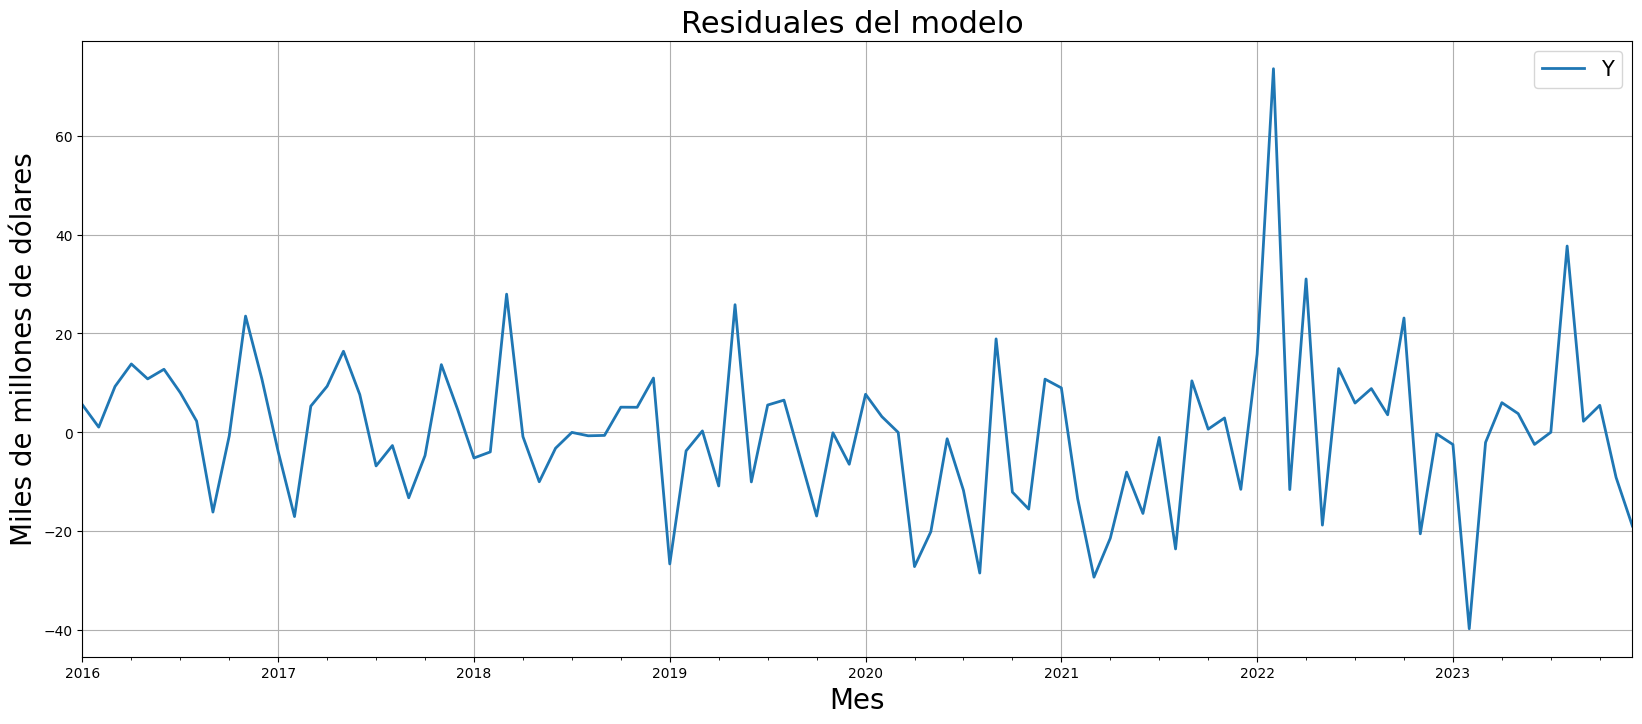

In [39]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [40]:
errors.mean()


-2.398081733190338e-14

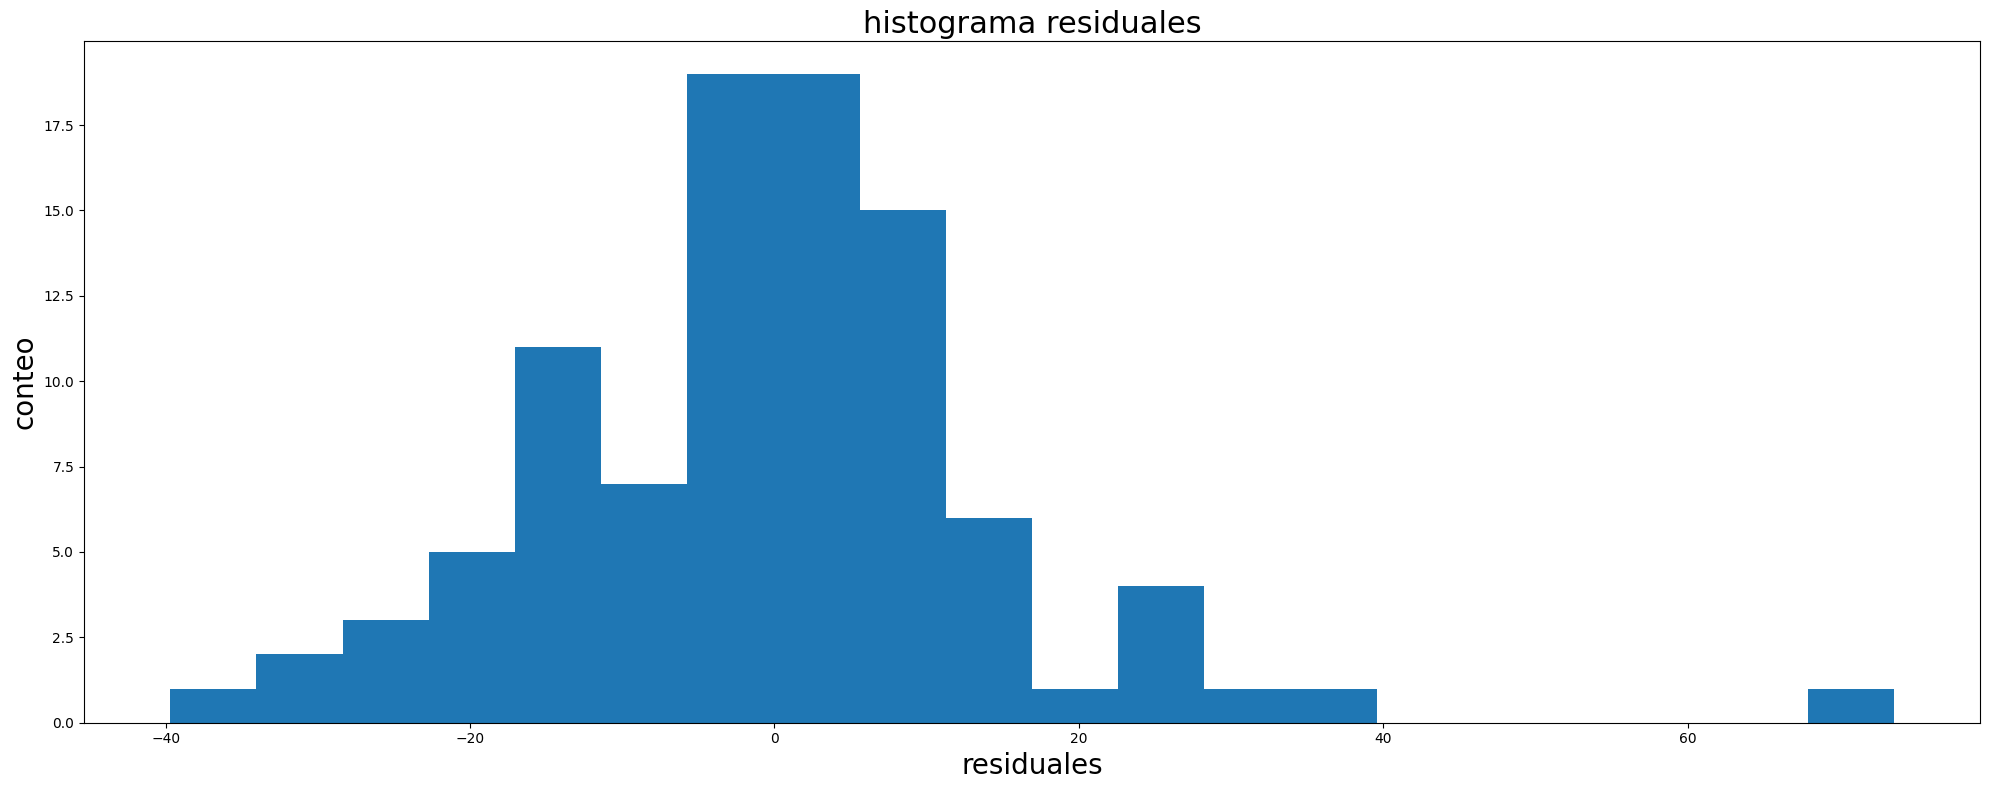

In [41]:


# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

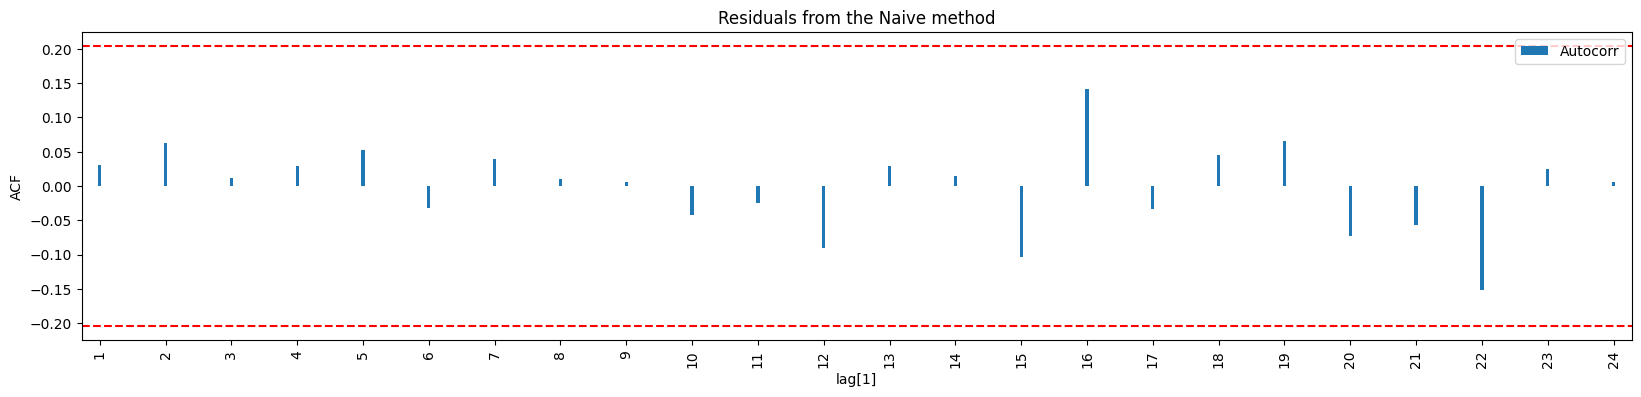

In [42]:

import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")



In [43]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])

0.9524069945088447

In [44]:
data_copy = data.copy()

In [45]:
LinearRegression().fit(data_copy.drop(columns=['Y']), data_copy['Y']).score(data_copy.drop(columns=['Y']), data_copy['Y'])

0.9524069945088447

In [46]:
data_copy.head()

,Y,Close,August,December,February,January,July,June,March,May,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,111.873161,0.714703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,101.663902,89.630135,89.161537,93.727798,85.512527,78.952286,78.533539,81.973190,78.732948,75.682137
2016-02-01,106.599045,0.765213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,103.927086,101.663902,89.630135,89.161537,93.727798,85.512527,78.952286,78.533539,81.973190,78.732948
2016-03-01,113.757492,0.872573,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,104.345833,103.927086,101.663902,89.630135,89.161537,93.727798,85.512527,78.952286,78.533539,81.973190
2016-04-01,117.227043,0.870124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111.873161,104.345833,103.927086,101.663902,89.630135,89.161537,93.727798,85.512527,78.952286,78.533539
2016-05-01,118.453354,1.144165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,106.599045,111.873161,104.345833,103.927086,101.663902,89.630135,89.161537,93.727798,85.512527,78.952286


In [47]:

LinearRegression().fit(data_copy.drop(columns=['Y']),
                       data_copy['Y']).score(data_copy.drop(
                                        columns=['Y']),
                                        data_copy['Y'])

0.9524069945088447

In [48]:


predict = LinearRegression().fit(data_copy.drop(columns=['Y']),
                                data_copy['Y']).predict(data_copy.drop(
                                            columns=['Y']))


In [49]:
errors = predict - data_copy['Y']


In [50]:
from scipy.special import inv_boxcox


In [51]:
lambda_val = sp.stats.boxcox(data['Y'])[1]


In [52]:
inverted_predictions = inv_boxcox(predict, lambda_val)


In [53]:
inverted_predictions[:12]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [54]:
errors = inverted_predictions - data['Y']


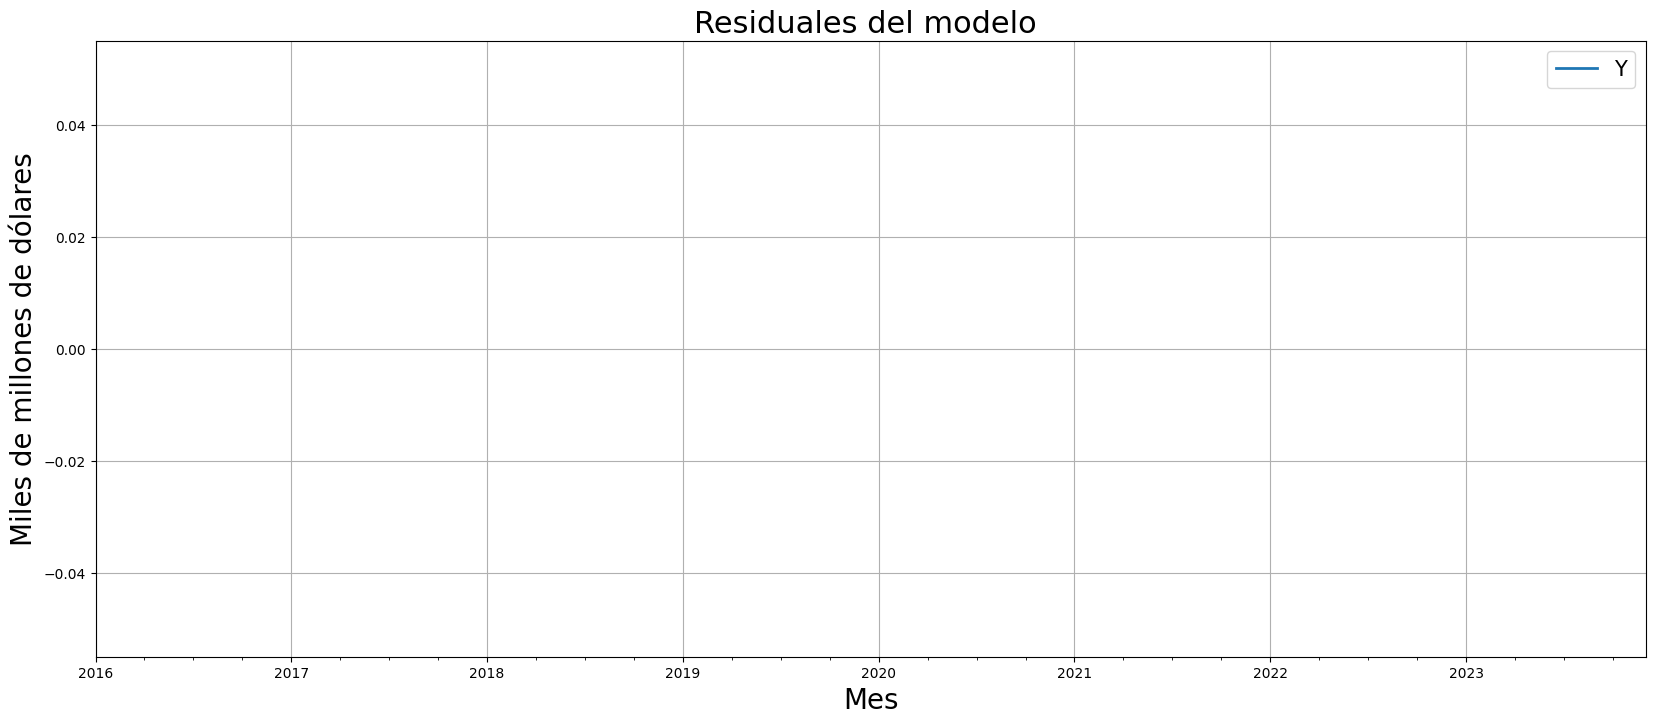

In [56]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


In [57]:


errors.mean()

nan

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

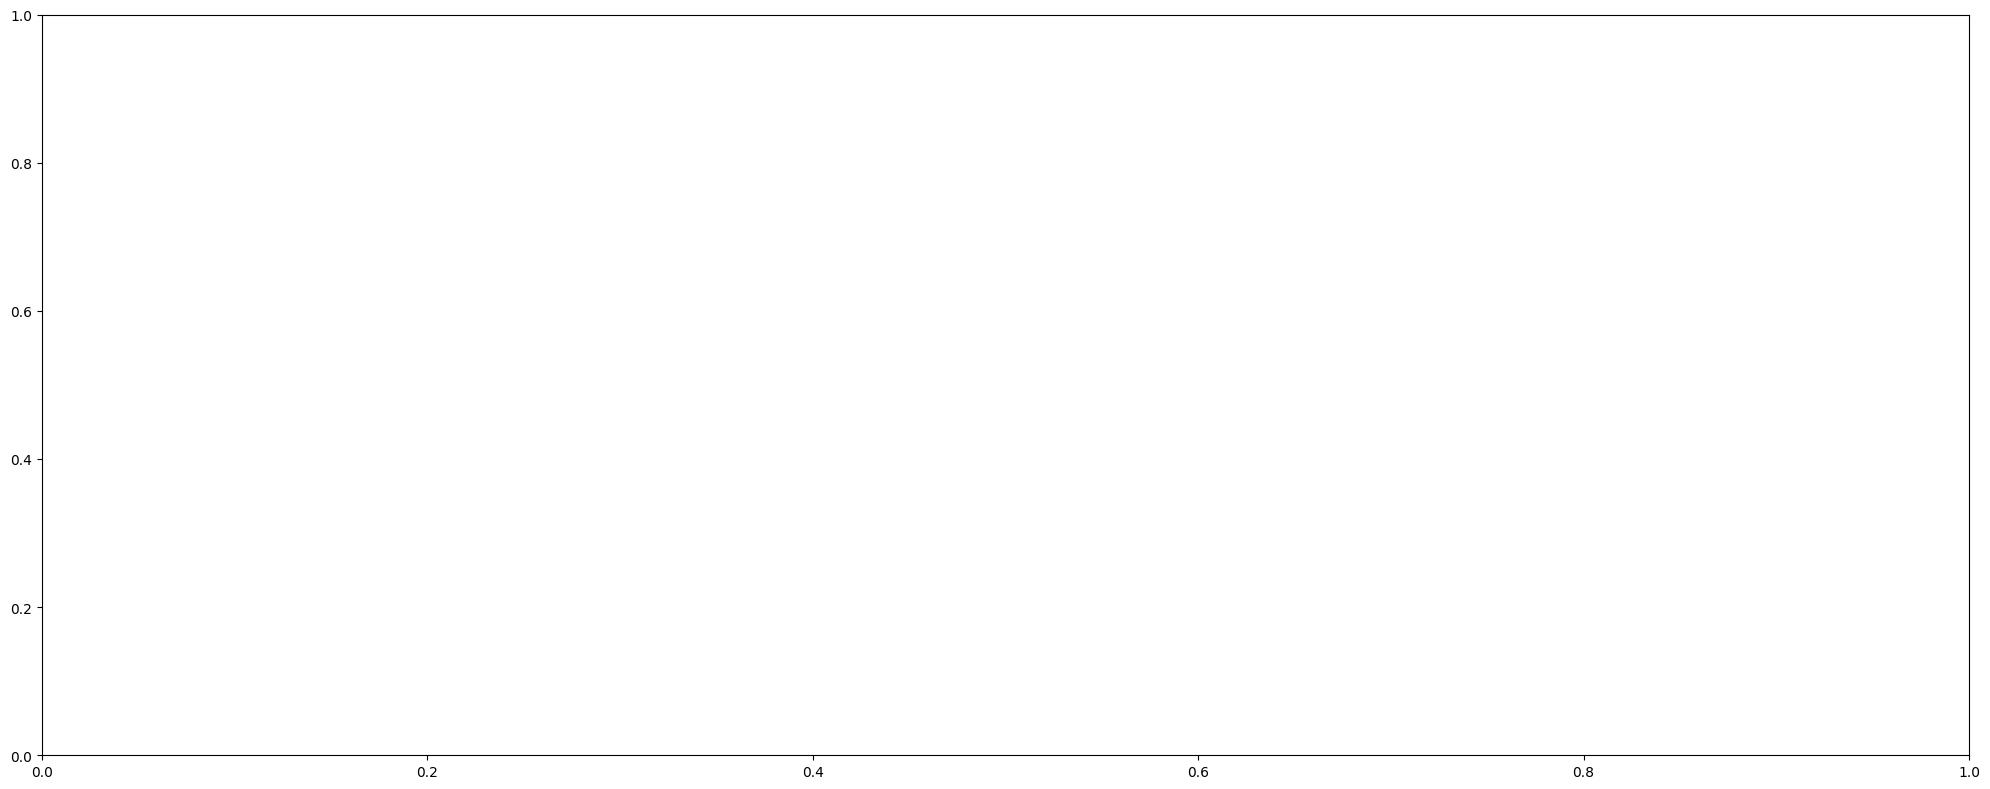

In [58]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

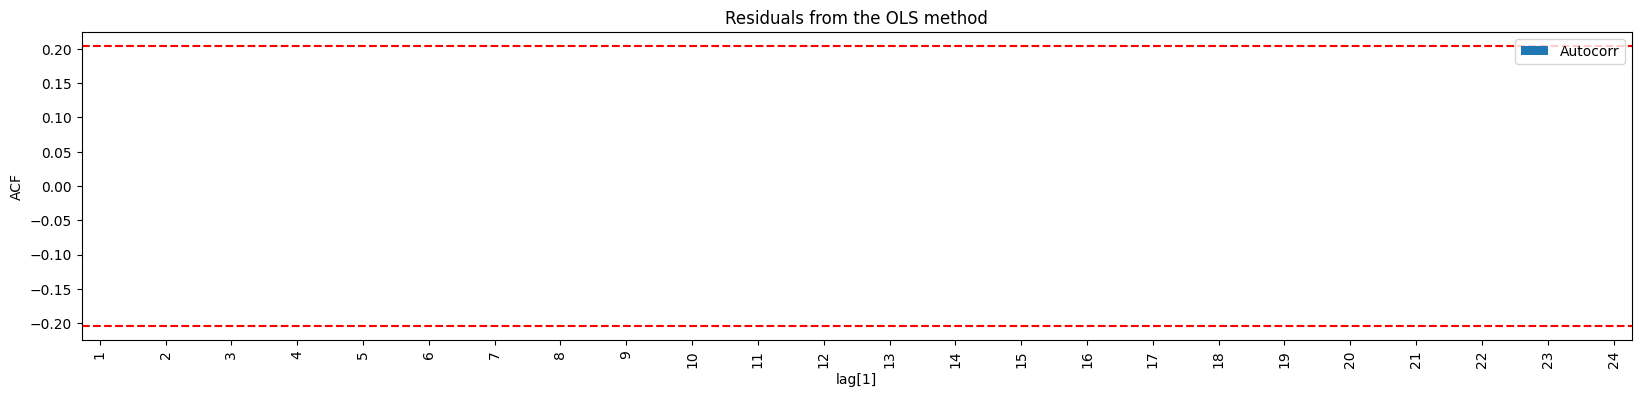

In [59]:

import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the OLS method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [1]:
from statsmodels.tsa.deterministic import Fourier

In [3]:
?statsmodels.tsa.deterministic.Fourier

Object `statsmodels.tsa.deterministic.Fourier` not found.


In [60]:
fourier_gen = Fourier(12, order=4)
fourier_data = fourier_gen.in_sample(data.index)


<Axes: xlabel='Date'>

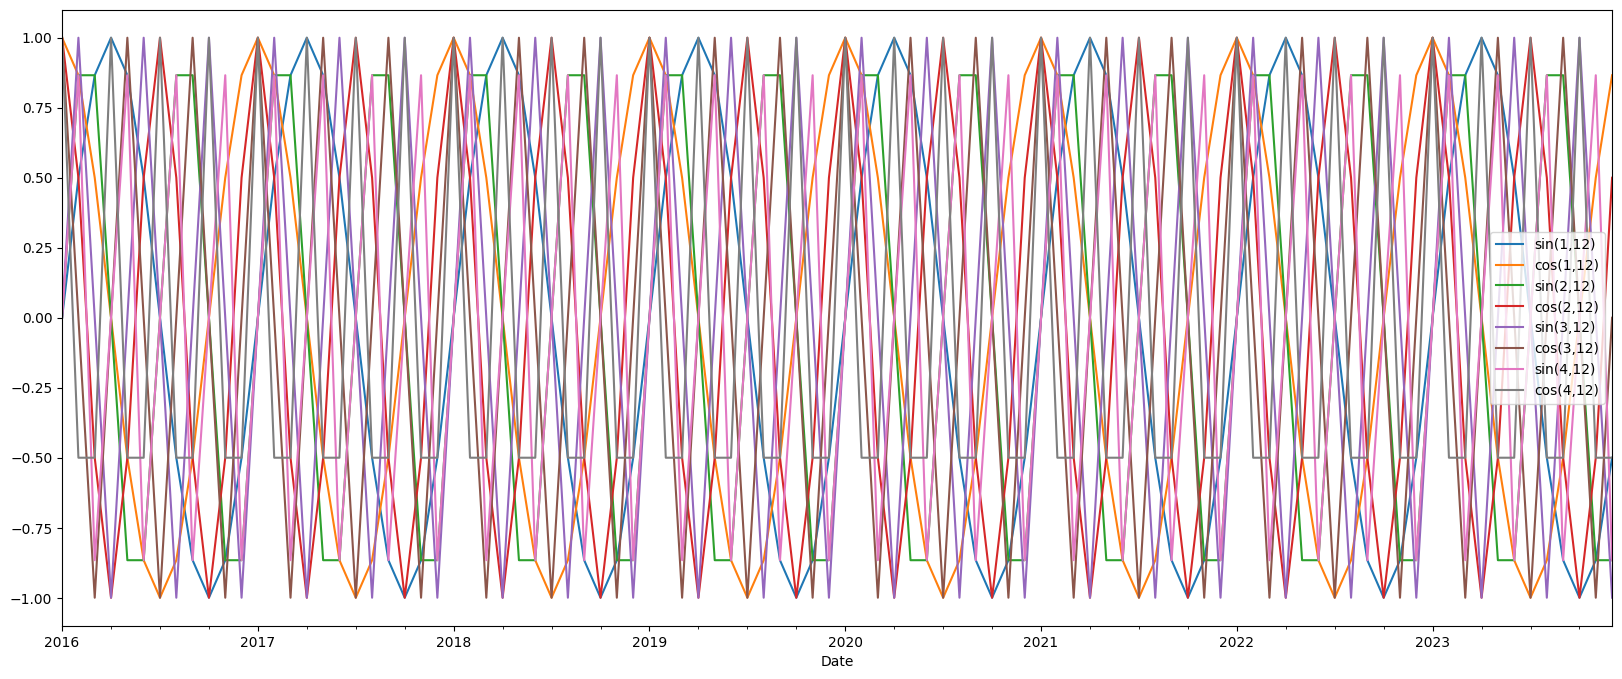

In [61]:
fourier_data.plot(figsize=(20, 8))


<Axes: xlabel='Date'>

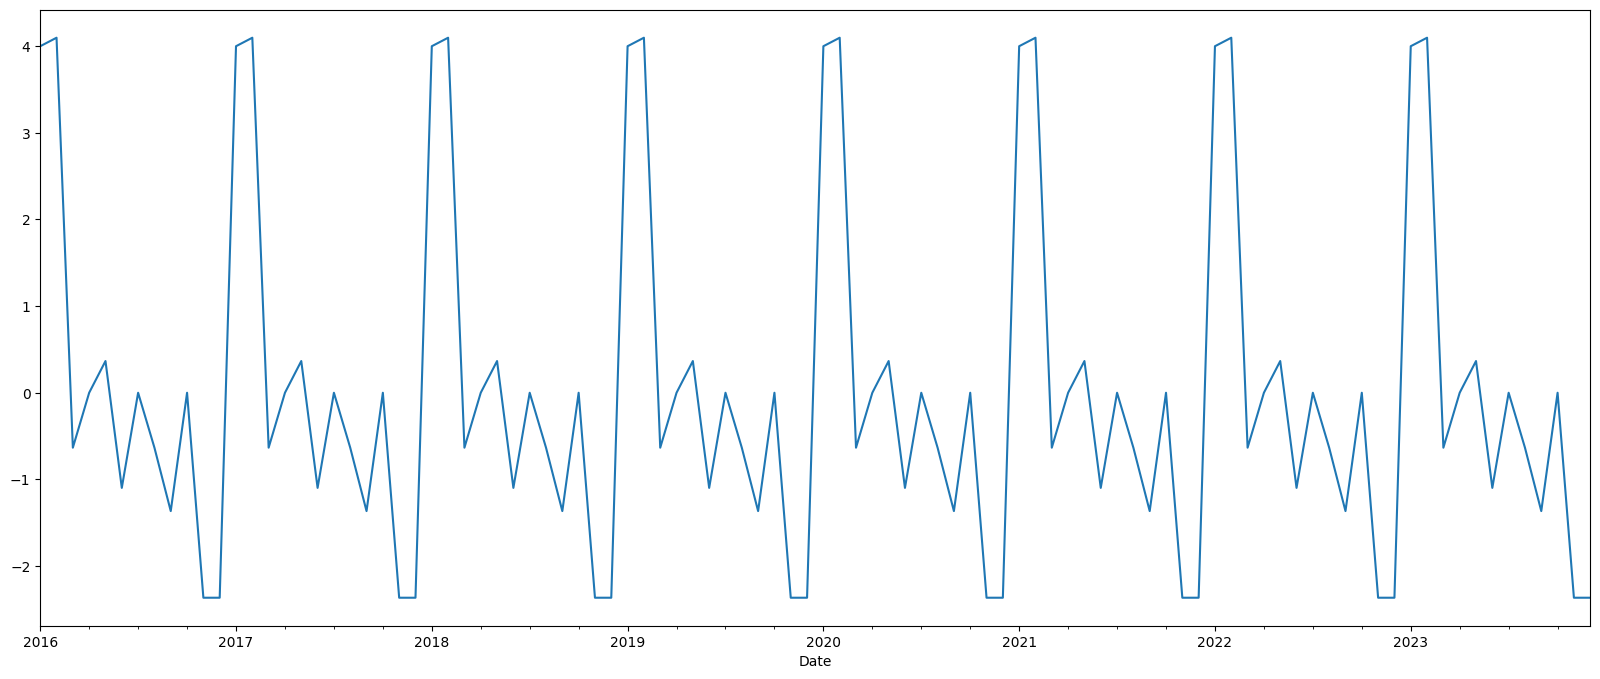

In [62]:
fourier_data.sum(1).plot(figsize=(20, 8))


In [63]:
data = data.join(fourier_data)


In [64]:
data.columns


Index(['Y', 'Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2018_outlier', '2020_outlier', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'sin(1,12)',
       'cos(1,12)', 'sin(2,12)', 'cos(2,12)', 'sin(3,12)', 'cos(3,12)',
       'sin(4,12)', 'cos(4,12)'],
      dtype='object')

In [65]:

LinearRegression().fit(data.drop(columns=['Y']),
                       data['Y']).score(data.drop(
                                        columns=['Y']),
                                        data['Y'])


0.9524069945088447

In [66]:


predict = LinearRegression().fit(data.drop(columns=['Y']),
                                data['Y']).predict(data.drop(
                                            columns=['Y']))

In [76]:
errors = predict - data['Y']

In [77]:
predict = pd.Series(predict, index=errors.index)

In [78]:
errors.sum()

2.3021584638627246e-12

In [79]:
errors.mean()


2.398081733190338e-14

In [69]:


training_mask = data.index > '2022-01-01'
test = data[training_mask]
train = data[~training_mask]

In [70]:
test.shape, train.shape



((23, 35), (73, 35))

In [73]:
errors1 = predict - data['Y']

In [75]:
errors1

,0
Date,
2016-01-01,5.585503
2016-02-01,1.065348
2016-03-01,9.292045
2016-04-01,13.837736
2016-05-01,10.820319
...,...
2023-08-01,37.685319
2023-09-01,2.254377
2023-10-01,5.478292


In [80]:
mae = np.mean(abs(errors))
mae


11.165130396980564

In [81]:
rmse = np.sqrt(np.mean(errors**2))
rmse

15.667348058688457

In [82]:
from sklearn.metrics import mean_absolute_percentage_error


In [83]:
mape = mean_absolute_percentage_error(data['Y'], predict)
mape


0.05974307794110715

<Axes: xlabel='Date'>

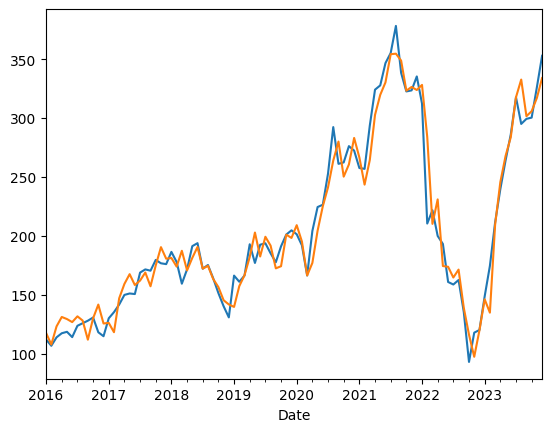

In [84]:

data['Y'].plot()
predict.plot()

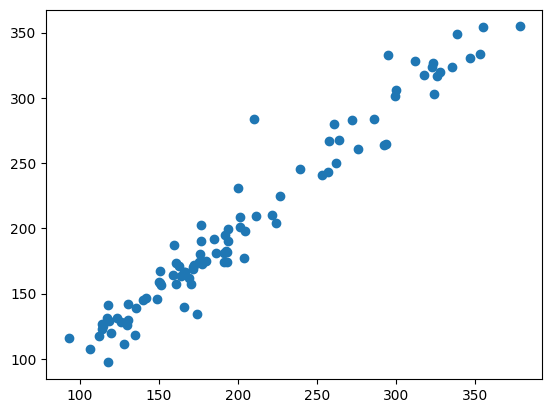

In [85]:
plt.scatter(data['Y'], predict)


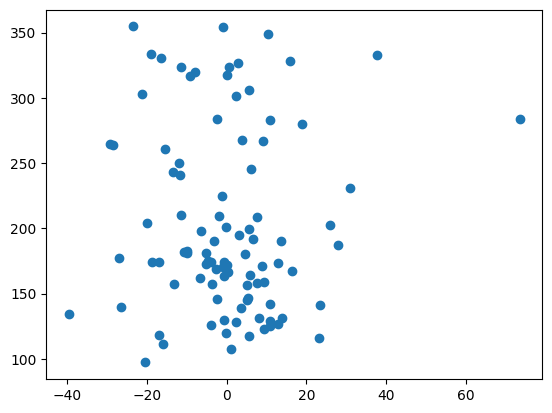

In [86]:
plt.scatter(x=errors, y=predict)


In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [88]:
Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])

0.9515369536310184

In [89]:
predict = Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).predict(data.drop(columns=['Y']))

In [90]:
Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).feature_names_in_

array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2018_outlier', '2020_outlier', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12',
       'sin(1,12)', 'cos(1,12)', 'sin(2,12)', 'cos(2,12)', 'sin(3,12)',
       'cos(3,12)', 'sin(4,12)', 'cos(4,12)'], dtype=object)

In [91]:
Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).coef_

array([  0.44080233,   1.08071731,  -0.99787352,  -5.59558856,
         3.43237853,   0.1633833 ,  -0.08290889,   4.30132894,
         2.51992628,   0.17006001,   0.91489904,  -4.32384911,
       -13.5101207 , -12.22311138,   1.04008669,  -0.04771855,
         0.07182177,   0.02517698,  -0.20089559,  -0.12221402,
         0.15240789,   0.1609795 ,  -0.1906161 ,   0.1183089 ,
        -0.30741282,   0.19040812,   4.12662422,  -0.16758197,
        -5.32310768,   0.13177622,  -3.26396888,  -3.00631655,
        -0.62490867,   4.39228131])

In [92]:
from sklearn.linear_model import RidgeCV

In [93]:
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100]).fit(data.drop(columns=['Y']), data['Y'])
ridge_cv.score(data.drop(columns=['Y']), data['Y'])

0.9437123419900855

In [94]:
ridge_cv.alpha_ # alpha = parametro lambda (mejor)

100.0

In [95]:
ridge_cv.best_score_ #error

-476.95650298504324

In [96]:
from sklearn.linear_model import Lasso

In [97]:
Lasso(alpha=0.1).fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])

0.9517151307274219

In [98]:
Lasso(alpha=1).fit(data.drop(columns=['Y']), data['Y']).feature_names_in_

array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2018_outlier', '2020_outlier', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12',
       'sin(1,12)', 'cos(1,12)', 'sin(2,12)', 'cos(2,12)', 'sin(3,12)',
       'cos(3,12)', 'sin(4,12)', 'cos(4,12)'], dtype=object)

In [99]:
Lasso(alpha=1).fit(data.drop(columns=['Y']), data['Y']).intercept_

18.809946254303327

In [100]:
Lasso(alpha=1).fit(data.drop(columns=['Y']), data['Y']).coef_

array([ 0.4821789 ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  1.00619128,
       -0.01374438,  0.06567347,  0.02563502, -0.20523076, -0.15842826,
        0.21244991,  0.14011047, -0.17609422,  0.07732977, -0.262584  ,
        0.17059495,  2.87172034, -0.        , -4.66792001, -0.        ,
       -1.95281097, -0.448344  , -0.        ,  3.35550044])

In [101]:
from sklearn.linear_model import LassoCV

In [102]:
lasso_cv = LassoCV(cv=5, random_state=0).fit(data.drop(columns=['Y']), data['Y'])
lasso_cv.score(data.drop(columns=['Y']), data['Y'])

0.9340490797764966

In [103]:
lasso_cv.alpha_

17.128368998631274

In [104]:
lasso_cv.coef_

array([ 0.36139749, -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.99891478,
       -0.        ,  0.0260341 ,  0.        , -0.10275836, -0.07981246,
        0.07905282,  0.06925294, -0.09147631, -0.        , -0.04981528,
        0.04041562,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ])